In [1]:
from catboost import CatBoostClassifier, CatBoostRegressor
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score, roc_auc_score, f1_score, recall_score, precision_recall_curve, auc, average_precision_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from fancyimpute import IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import GridSearchCV
import xlsxwriter
from random import randint
random_state = 7656
from preprocessing import stds, stats, cv_preprocessing
from load_data import load_data
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
#from tensorflow.keras.layers import Conv2D, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [2]:
df_preprocessed, features, target_feature = load_data()


In [3]:
target_feature

['PCL_Strict3',
 'target_tred',
 'target_intrusion',
 'target_avoidance',
 'target_hyper',
 'phq3',
 'target_binary_intrusion',
 'q6.1_INTRU_target',
 'q6.2_DREAM_target',
 'q6.3_FLASH_target',
 'q6.4_UPSET_target',
 'q6.5_PHYS_target']

In [4]:
df_preprocessed, features, target_feature = load_data()
df_preprocessed = df_preprocessed[~df_preprocessed['phq3'].isna()]
secondary_targets = {
     'q6.1_INTRU_target':2,
 'q6.2_DREAM_target':2,
 'q6.3_FLASH_target':2,
 'q6.4_UPSET_target':2,
 'q6.5_PHYS_target':2,
 #   'PCL_Strict3':1,
# 'target_avoidance':5,
# 'target_hyper':7,
    #'phq3':13
}

In [5]:
a = (df_preprocessed[secondary_targets.keys()] > 2).sum(axis=1) > 0

In [7]:
df_preprocessed[a != df_preprocessed['target_binary_intrusion']]

,highschool_diploma,dyslexia,ADHD,T1Acc1t,T1Acc1n,T1bias,phq1,trait1,state1,PCL1,...,T1q5.1,T1q5.2,T1q5.3,T1q5.4,T1q5.5,T1q5.6,T1q5.7,T1q5.8,T1q5.9,t1_missing


In [8]:
b = (df_preprocessed[secondary_targets.keys()] > 2)

In [9]:
(b.count()-b.sum())/b.sum()

q6.1_INTRU_target     7.115942
q6.2_DREAM_target    11.444444
q6.3_FLASH_target    11.173913
q6.4_UPSET_target     7.484848
q6.5_PHYS_target     12.333333
dtype: float64

In [10]:
(a.count()-a.sum())/a.sum()

3.4444444444444446

C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:773: RuntimeWarning: invalid value encountered in true_divide
  dfbetas /= np.sqrt(self.sigma2_not_obsi[:, None])


Epoch 1/275
384/384 [==============================] - 5s 14ms/sample - loss: 1.1229 - dense_334_loss: 0.6955 - dense_335_loss: 0.7467 - dense_336_loss: 0.6407 - dense_337_loss: 0.7971 - dense_338_loss: 0.6647 - dense_339_loss: 0.6742 - dense_340_loss: 0.7645
Epoch 2/275
384/384 [==============================] - 0s 302us/sample - loss: 1.1250 - dense_334_loss: 0.6996 - dense_335_loss: 0.7433 - dense_336_loss: 0.6598 - dense_337_loss: 0.7741 - dense_338_loss: 0.6799 - dense_339_loss: 0.6703 - dense_340_loss: 0.7504
Epoch 3/275
384/384 [==============================] - 0s 262us/sample - loss: 1.0995 - dense_334_loss: 0.6808 - dense_335_loss: 0.7314 - dense_336_loss: 0.6363 - dense_337_loss: 0.7795 - dense_338_loss: 0.6530 - dense_339_loss: 0.6539 - dense_340_loss: 0.7583
Epoch 4/275
384/384 [==============================] - 0s 253us/sample - loss: 1.0889 - dense_334_loss: 0.6762 - dense_335_loss: 0.7219 - dense_336_loss: 0.6387 - dense_337_loss: 0.7755 - dense_338_loss: 0.6527 - dense

384/384 [==============================] - 0s 222us/sample - loss: 0.9220 - dense_334_loss: 0.5812 - dense_335_loss: 0.6095 - dense_336_loss: 0.5135 - dense_337_loss: 0.6269 - dense_338_loss: 0.5932 - dense_339_loss: 0.5472 - dense_340_loss: 0.5817
Epoch 31/275
384/384 [==============================] - 0s 264us/sample - loss: 0.8968 - dense_334_loss: 0.5652 - dense_335_loss: 0.5922 - dense_336_loss: 0.5105 - dense_337_loss: 0.6119 - dense_338_loss: 0.5828 - dense_339_loss: 0.5419 - dense_340_loss: 0.5718 - loss: 0.8949 - dense_334_loss: 0.5638 - dense_335_loss: 0.5894 - dense_336_loss: 0.5075 - dense_337_loss: 0.6257 - dense_338_loss: 0.5782 - dense_339_loss: 0.5395 - dense_340_loss: 0.57
Epoch 32/275
384/384 [==============================] - 0s 341us/sample - loss: 0.9040 - dense_334_loss: 0.5681 - dense_335_loss: 0.5990 - dense_336_loss: 0.5096 - dense_337_loss: 0.6135 - dense_338_loss: 0.5744 - dense_339_loss: 0.5460 - dense_340_loss: 0.5737
Epoch 33/275
384/384 [=================

384/384 [==============================] - 0s 234us/sample - loss: 0.8200 - dense_334_loss: 0.5247 - dense_335_loss: 0.5421 - dense_336_loss: 0.4688 - dense_337_loss: 0.5452 - dense_338_loss: 0.5522 - dense_339_loss: 0.5010 - dense_340_loss: 0.4146
Epoch 61/275
384/384 [==============================] - 0s 245us/sample - loss: 0.8080 - dense_334_loss: 0.5171 - dense_335_loss: 0.5496 - dense_336_loss: 0.4459 - dense_337_loss: 0.5476 - dense_338_loss: 0.5546 - dense_339_loss: 0.4940 - dense_340_loss: 0.4146
Epoch 62/275
384/384 [==============================] - 0s 269us/sample - loss: 0.8126 - dense_334_loss: 0.5220 - dense_335_loss: 0.5375 - dense_336_loss: 0.4586 - dense_337_loss: 0.5412 - dense_338_loss: 0.5621 - dense_339_loss: 0.4914 - dense_340_loss: 0.4155
Epoch 63/275
384/384 [==============================] - ETA: 0s - loss: 0.7785 - dense_334_loss: 0.4978 - dense_335_loss: 0.5502 - dense_336_loss: 0.4163 - dense_337_loss: 0.4944 - dense_338_loss: 0.5416 - dense_339_loss: 0.459

384/384 [==============================] - 0s 221us/sample - loss: 0.7547 - dense_334_loss: 0.4829 - dense_335_loss: 0.5071 - dense_336_loss: 0.4375 - dense_337_loss: 0.5020 - dense_338_loss: 0.5475 - dense_339_loss: 0.4494 - dense_340_loss: 0.3605
Epoch 91/275
384/384 [==============================] - 0s 226us/sample - loss: 0.7793 - dense_334_loss: 0.5073 - dense_335_loss: 0.5053 - dense_336_loss: 0.4426 - dense_337_loss: 0.5033 - dense_338_loss: 0.5579 - dense_339_loss: 0.4652 - dense_340_loss: 0.3682
Epoch 92/275
384/384 [==============================] - 0s 243us/sample - loss: 0.7399 - dense_334_loss: 0.4730 - dense_335_loss: 0.4855 - dense_336_loss: 0.4226 - dense_337_loss: 0.4595 - dense_338_loss: 0.5250 - dense_339_loss: 0.4676 - dense_340_loss: 0.3700
Epoch 93/275
384/384 [==============================] - 0s 248us/sample - loss: 0.7595 - dense_334_loss: 0.4925 - dense_335_loss: 0.4843 - dense_336_loss: 0.4333 - dense_337_loss: 0.5013 - dense_338_loss: 0.5436 - dense_339_los

384/384 [==============================] - 0s 259us/sample - loss: 0.7100 - dense_334_loss: 0.4512 - dense_335_loss: 0.4436 - dense_336_loss: 0.4149 - dense_337_loss: 0.4659 - dense_338_loss: 0.5252 - dense_339_loss: 0.4504 - dense_340_loss: 0.3318
Epoch 121/275
384/384 [==============================] - 0s 262us/sample - loss: 0.7451 - dense_334_loss: 0.4783 - dense_335_loss: 0.4685 - dense_336_loss: 0.4442 - dense_337_loss: 0.4908 - dense_338_loss: 0.5402 - dense_339_loss: 0.4579 - dense_340_loss: 0.3603
Epoch 122/275
384/384 [==============================] - 0s 243us/sample - loss: 0.7325 - dense_334_loss: 0.4777 - dense_335_loss: 0.4682 - dense_336_loss: 0.4235 - dense_337_loss: 0.4758 - dense_338_loss: 0.5329 - dense_339_loss: 0.4589 - dense_340_loss: 0.3485
Epoch 123/275
384/384 [==============================] - 0s 237us/sample - loss: 0.7232 - dense_334_loss: 0.4582 - dense_335_loss: 0.4647 - dense_336_loss: 0.4180 - dense_337_loss: 0.4753 - dense_338_loss: 0.5195 - dense_339_

384/384 [==============================] - 0s 241us/sample - loss: 0.7206 - dense_334_loss: 0.4655 - dense_335_loss: 0.4501 - dense_336_loss: 0.4134 - dense_337_loss: 0.4526 - dense_338_loss: 0.5231 - dense_339_loss: 0.4567 - dense_340_loss: 0.3493
Epoch 152/275
384/384 [==============================] - 0s 234us/sample - loss: 0.6903 - dense_334_loss: 0.4395 - dense_335_loss: 0.4493 - dense_336_loss: 0.4097 - dense_337_loss: 0.4345 - dense_338_loss: 0.4883 - dense_339_loss: 0.4474 - dense_340_loss: 0.3335
Epoch 153/275
384/384 [==============================] - 0s 233us/sample - loss: 0.7179 - dense_334_loss: 0.4615 - dense_335_loss: 0.4429 - dense_336_loss: 0.4107 - dense_337_loss: 0.4587 - dense_338_loss: 0.5368 - dense_339_loss: 0.4427 - dense_340_loss: 0.3330
Epoch 154/275
384/384 [==============================] - 0s 231us/sample - loss: 0.7112 - dense_334_loss: 0.4626 - dense_335_loss: 0.4552 - dense_336_loss: 0.3947 - dense_337_loss: 0.4302 - dense_338_loss: 0.5277 - dense_339_

384/384 [==============================] - 0s 230us/sample - loss: 0.6805 - dense_334_loss: 0.4361 - dense_335_loss: 0.4285 - dense_336_loss: 0.4044 - dense_337_loss: 0.4360 - dense_338_loss: 0.5124 - dense_339_loss: 0.4273 - dense_340_loss: 0.3252
Epoch 181/275
384/384 [==============================] - 0s 234us/sample - loss: 0.6736 - dense_334_loss: 0.4321 - dense_335_loss: 0.4212 - dense_336_loss: 0.3973 - dense_337_loss: 0.4251 - dense_338_loss: 0.5054 - dense_339_loss: 0.4401 - dense_340_loss: 0.3190
Epoch 182/275
384/384 [==============================] - 0s 248us/sample - loss: 0.7030 - dense_334_loss: 0.4522 - dense_335_loss: 0.4334 - dense_336_loss: 0.3997 - dense_337_loss: 0.4513 - dense_338_loss: 0.5219 - dense_339_loss: 0.4472 - dense_340_loss: 0.3385
Epoch 183/275
384/384 [==============================] - 0s 232us/sample - loss: 0.7037 - dense_334_loss: 0.4563 - dense_335_loss: 0.4350 - dense_336_loss: 0.4085 - dense_337_loss: 0.4443 - dense_338_loss: 0.5370 - dense_339_

384/384 [==============================] - 0s 244us/sample - loss: 0.6817 - dense_334_loss: 0.4347 - dense_335_loss: 0.4354 - dense_336_loss: 0.4021 - dense_337_loss: 0.4274 - dense_338_loss: 0.5279 - dense_339_loss: 0.4260 - dense_340_loss: 0.3244
Epoch 210/275
384/384 [==============================] - 0s 221us/sample - loss: 0.6999 - dense_334_loss: 0.4499 - dense_335_loss: 0.4366 - dense_336_loss: 0.4079 - dense_337_loss: 0.4455 - dense_338_loss: 0.5291 - dense_339_loss: 0.4258 - dense_340_loss: 0.3321
Epoch 211/275
384/384 [==============================] - 0s 229us/sample - loss: 0.6899 - dense_334_loss: 0.4420 - dense_335_loss: 0.4242 - dense_336_loss: 0.3926 - dense_337_loss: 0.4328 - dense_338_loss: 0.5260 - dense_339_loss: 0.4391 - dense_340_loss: 0.3250
Epoch 212/275
384/384 [==============================] - 0s 241us/sample - loss: 0.6677 - dense_334_loss: 0.4219 - dense_335_loss: 0.4128 - dense_336_loss: 0.3987 - dense_337_loss: 0.4429 - dense_338_loss: 0.4778 - dense_339_

384/384 [==============================] - 0s 264us/sample - loss: 0.6752 - dense_334_loss: 0.4309 - dense_335_loss: 0.4352 - dense_336_loss: 0.4001 - dense_337_loss: 0.4220 - dense_338_loss: 0.5128 - dense_339_loss: 0.4148 - dense_340_loss: 0.3173
Epoch 239/275
384/384 [==============================] - 0s 246us/sample - loss: 0.6836 - dense_334_loss: 0.4417 - dense_335_loss: 0.4151 - dense_336_loss: 0.3955 - dense_337_loss: 0.4279 - dense_338_loss: 0.5062 - dense_339_loss: 0.4251 - dense_340_loss: 0.3172
Epoch 240/275
384/384 [==============================] - 0s 246us/sample - loss: 0.6676 - dense_334_loss: 0.4283 - dense_335_loss: 0.4126 - dense_336_loss: 0.3772 - dense_337_loss: 0.3993 - dense_338_loss: 0.5203 - dense_339_loss: 0.4285 - dense_340_loss: 0.3098 - loss: 0.6422 - dense_334_loss: 0.3990 - dense_335_loss: 0.4147 - dense_336_loss: 0.3780 - dense_337_loss: 0.4176 - dense_338_loss: 0.4993 - dense_339_loss: 0.4698 - dense_340_loss: 0.35
Epoch 241/275
384/384 [==============

384/384 [==============================] - 0s 270us/sample - loss: 0.6604 - dense_334_loss: 0.4203 - dense_335_loss: 0.3941 - dense_336_loss: 0.3857 - dense_337_loss: 0.4182 - dense_338_loss: 0.5183 - dense_339_loss: 0.4144 - dense_340_loss: 0.3062
Epoch 269/275
384/384 [==============================] - 0s 252us/sample - loss: 0.6641 - dense_334_loss: 0.4290 - dense_335_loss: 0.4218 - dense_336_loss: 0.3695 - dense_337_loss: 0.3948 - dense_338_loss: 0.5110 - dense_339_loss: 0.4219 - dense_340_loss: 0.3144
Epoch 270/275
384/384 [==============================] - 0s 237us/sample - loss: 0.6146 - dense_334_loss: 0.3855 - dense_335_loss: 0.3980 - dense_336_loss: 0.3686 - dense_337_loss: 0.3810 - dense_338_loss: 0.4708 - dense_339_loss: 0.4221 - dense_340_loss: 0.3039
Epoch 271/275
384/384 [==============================] - 0s 359us/sample - loss: 0.6997 - dense_334_loss: 0.4524 - dense_335_loss: 0.4287 - dense_336_loss: 0.3986 - dense_337_loss: 0.4468 - dense_338_loss: 0.5439 - dense_339_

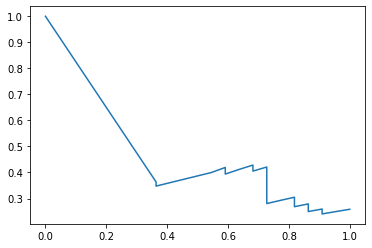

holdout i = PCL_Strict3, roc_auc = 0.6872727272727274


In [31]:
df_preprocessed, features, target_feature = load_data()
#df_preprocessed = df_preprocessed[~df_preprocessed['phq3'].isna()]

secondary_targets = {
     'q6.1_INTRU_target':1,
 'q6.2_DREAM_target':1,
 'q6.3_FLASH_target':1,
 'q6.4_UPSET_target':1,
 'q6.5_PHYS_target':1,
    'PCL_Strict3':1,
     'q6.1_INTRU_target':2,
 'q6.2_DREAM_target':2,
 'q6.3_FLASH_target':2,
 'q6.4_UPSET_target':2,
 'q6.5_PHYS_target':2,
    'PCL_Strict3':0,

    # 'target_avoidance':5,
 #'target_hyper':7,
  #  'phq3':13
}

for j in range(1):
    X, X_out, Y, y_out = train_test_split(df_preprocessed[features + list(secondary_targets.keys())], df_preprocessed['target_binary_intrusion'],\
                                          test_size=0.15, random_state=random_state,\
                                          stratify=df_preprocessed['target_binary_intrusion'])



    for i in [random_state]:
        x_train, x_test, y_train, y_test = train_test_split(X, Y,  random_state=i, test_size=0.2, stratify=Y)
        y_train = [y_train]
        
        for k in secondary_targets.keys():
            y_train.append(x_train[k].apply(lambda x: int(x <= secondary_targets[k])))
        
        x_train = x_train[features]
        x_test = x_test[features]
    
        x_train, x_test = cv_preprocessing(x_train, x_test, i)

        ss = StandardScaler()
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)
        visible = Input(shape=(x_train.shape[1],))
   

        y = Dense(3, activation='relu')(visible)
        y = Dropout(0.1)(y)

        x = Dense(3, activation='relu')(y)
        x = Dropout(0.1)(x)
        
        outputs = [Dense(1, activation='sigmoid')(x)]
        
        
        for i in secondary_targets.keys():
            outputs.append(Dense(1, activation='sigmoid')(x))
        
        
        model = Model(inputs=visible, outputs=outputs)
        #callbacks = [EarlyStopping(monitor='val_loss', patience=5)]
        model.compile(loss=['binary_crossentropy']+['binary_crossentropy'] * len(secondary_targets.keys()),
              optimizer=Adam(), loss_weights = [1] + [1e-1] * len(secondary_targets.keys()))
        model.fit(x_train,y_train , epochs = 275, class_weight=[{0:1, 1:2}]+[{0:1,1:0.25}] * len(secondary_targets.keys()), verbose=1)
        # evaluate the model
        y_pred = model.predict(x_test)[0]



    
        for t in np.arange(0.1,1,0.1):
            print(t,'f1_score', f1_score(y_test.astype(int), y_pred>t))

        
        precision, recall, _ = precision_recall_curve(y_test.astype(int), y_pred)
        avs = average_precision_score(y_test.astype(int), y_pred)
        print(f"average_precision_score = {avs}")

        auc_score = auc(recall, precision)
        print(f"pr_auc = {auc_score}")
        plt.plot(recall, precision)
        plt.show()
        print(f"holdout i = {i}, roc_auc = {roc_auc_score(y_test.astype(int), y_pred)}")

C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:693: RuntimeWarning: invalid value encountered in true_divide
  return self.resid / sigma / np.sqrt(1 - hii)
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\nogag\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:773: RuntimeWarning: invalid value encountered in true_divide
  dfbetas /= np.sqrt(self.sigma2_not_obsi[:, None])


Epoch 1/275
384/384 [==============================] - 5s 14ms/sample - loss: 1.5007 - dense_343_loss: 1.0230 - dense_344_loss: 1.0859 - dense_345_loss: 0.7029 - dense_346_loss: 0.7588 - dense_347_loss: 0.9392 - dense_348_loss: 0.9309 - dense_349_loss: 0.4160
Epoch 2/275
384/384 [==============================] - 0s 258us/sample - loss: 1.3380 - dense_343_loss: 0.8801 - dense_344_loss: 1.0877 - dense_345_loss: 0.6853 - dense_346_loss: 0.6929 - dense_347_loss: 0.8671 - dense_348_loss: 0.9140 - dense_349_loss: 0.4090
Epoch 3/275
384/384 [==============================] - 0s 267us/sample - loss: 1.3306 - dense_343_loss: 0.8786 - dense_344_loss: 1.0334 - dense_345_loss: 0.6939 - dense_346_loss: 0.6968 - dense_347_loss: 0.8610 - dense_348_loss: 0.8822 - dense_349_loss: 0.4096
Epoch 4/275
384/384 [==============================] - 0s 318us/sample - loss: 1.2465 - dense_343_loss: 0.8088 - dense_344_loss: 1.0055 - dense_345_loss: 0.6702 - dense_346_loss: 0.6553 - dense_347_loss: 0.8069 - dense

384/384 [==============================] - 0s 274us/sample - loss: 0.9161 - dense_343_loss: 0.5866 - dense_344_loss: 0.8364 - dense_345_loss: 0.5023 - dense_346_loss: 0.4588 - dense_347_loss: 0.6134 - dense_348_loss: 0.6413 - dense_349_loss: 0.2737
Epoch 33/275
384/384 [==============================] - 0s 288us/sample - loss: 0.9173 - dense_343_loss: 0.5895 - dense_344_loss: 0.8297 - dense_345_loss: 0.5007 - dense_346_loss: 0.4602 - dense_347_loss: 0.6116 - dense_348_loss: 0.6344 - dense_349_loss: 0.2693
Epoch 34/275
384/384 [==============================] - 0s 325us/sample - loss: 0.9240 - dense_343_loss: 0.5963 - dense_344_loss: 0.8130 - dense_345_loss: 0.5019 - dense_346_loss: 0.4771 - dense_347_loss: 0.6210 - dense_348_loss: 0.6289 - dense_349_loss: 0.2759
Epoch 35/275
384/384 [==============================] - 0s 358us/sample - loss: 0.9203 - dense_343_loss: 0.5915 - dense_344_loss: 0.8098 - dense_345_loss: 0.4988 - dense_346_loss: 0.4819 - dense_347_loss: 0.6194 - dense_348_los

384/384 [==============================] - 0s 246us/sample - loss: 0.8368 - dense_343_loss: 0.5478 - dense_344_loss: 0.7047 - dense_345_loss: 0.4364 - dense_346_loss: 0.4482 - dense_347_loss: 0.6046 - dense_348_loss: 0.5304 - dense_349_loss: 0.1897
Epoch 62/275
384/384 [==============================] - 0s 288us/sample - loss: 0.8155 - dense_343_loss: 0.5322 - dense_344_loss: 0.6985 - dense_345_loss: 0.4354 - dense_346_loss: 0.4424 - dense_347_loss: 0.5780 - dense_348_loss: 0.5220 - dense_349_loss: 0.1924
Epoch 63/275
384/384 [==============================] - 0s 248us/sample - loss: 0.8237 - dense_343_loss: 0.5428 - dense_344_loss: 0.7008 - dense_345_loss: 0.4300 - dense_346_loss: 0.4397 - dense_347_loss: 0.6031 - dense_348_loss: 0.5215 - dense_349_loss: 0.1865
Epoch 64/275
384/384 [==============================] - 0s 294us/sample - loss: 0.8068 - dense_343_loss: 0.5270 - dense_344_loss: 0.6956 - dense_345_loss: 0.4223 - dense_346_loss: 0.4351 - dense_347_loss: 0.5806 - dense_348_los

384/384 [==============================] - 0s 228us/sample - loss: 0.7734 - dense_343_loss: 0.5088 - dense_344_loss: 0.6329 - dense_345_loss: 0.4064 - dense_346_loss: 0.4307 - dense_347_loss: 0.5773 - dense_348_loss: 0.4730 - dense_349_loss: 0.1417
Epoch 93/275
384/384 [==============================] - 0s 245us/sample - loss: 0.7863 - dense_343_loss: 0.5219 - dense_344_loss: 0.6329 - dense_345_loss: 0.4194 - dense_346_loss: 0.4405 - dense_347_loss: 0.5725 - dense_348_loss: 0.4894 - dense_349_loss: 0.1414
Epoch 94/275
384/384 [==============================] - 0s 254us/sample - loss: 0.7847 - dense_343_loss: 0.5166 - dense_344_loss: 0.6316 - dense_345_loss: 0.4182 - dense_346_loss: 0.4488 - dense_347_loss: 0.5859 - dense_348_loss: 0.4817 - dense_349_loss: 0.1443 - loss: 0.7777 - dense_343_loss: 0.5208 - dense_344_loss: 0.6267 - dense_345_loss: 0.4073 - dense_346_loss: 0.4165 - dense_347_loss: 0.5403 - dense_348_loss: 0.4836 - dense_349_loss: 0.13
Epoch 95/275
384/384 [=================

384/384 [==============================] - 0s 254us/sample - loss: 0.7406 - dense_343_loss: 0.4865 - dense_344_loss: 0.6081 - dense_345_loss: 0.4001 - dense_346_loss: 0.4183 - dense_347_loss: 0.5761 - dense_348_loss: 0.4685 - dense_349_loss: 0.1117
Epoch 123/275
384/384 [==============================] - 0s 288us/sample - loss: 0.7350 - dense_343_loss: 0.4807 - dense_344_loss: 0.6096 - dense_345_loss: 0.3967 - dense_346_loss: 0.4226 - dense_347_loss: 0.5838 - dense_348_loss: 0.4633 - dense_349_loss: 0.1088
Epoch 124/275
384/384 [==============================] - 0s 290us/sample - loss: 0.7545 - dense_343_loss: 0.4937 - dense_344_loss: 0.6096 - dense_345_loss: 0.4107 - dense_346_loss: 0.4395 - dense_347_loss: 0.5857 - dense_348_loss: 0.4694 - dense_349_loss: 0.1160
Epoch 125/275
384/384 [==============================] - 0s 242us/sample - loss: 0.7383 - dense_343_loss: 0.4814 - dense_344_loss: 0.5998 - dense_345_loss: 0.3915 - dense_346_loss: 0.4363 - dense_347_loss: 0.5658 - dense_348_

384/384 [==============================] - 0s 235us/sample - loss: 0.7080 - dense_343_loss: 0.4576 - dense_344_loss: 0.5880 - dense_345_loss: 0.3922 - dense_346_loss: 0.4164 - dense_347_loss: 0.5718 - dense_348_loss: 0.4541 - dense_349_loss: 0.0896
Epoch 154/275
384/384 [==============================] - 0s 285us/sample - loss: 0.7159 - dense_343_loss: 0.4689 - dense_344_loss: 0.5850 - dense_345_loss: 0.3831 - dense_346_loss: 0.4061 - dense_347_loss: 0.5661 - dense_348_loss: 0.4581 - dense_349_loss: 0.0876
Epoch 155/275
384/384 [==============================] - 0s 250us/sample - loss: 0.7336 - dense_343_loss: 0.4811 - dense_344_loss: 0.5922 - dense_345_loss: 0.4030 - dense_346_loss: 0.4162 - dense_347_loss: 0.5718 - dense_348_loss: 0.4583 - dense_349_loss: 0.0898
Epoch 156/275
384/384 [==============================] - 0s 297us/sample - loss: 0.6968 - dense_343_loss: 0.4491 - dense_344_loss: 0.5939 - dense_345_loss: 0.3965 - dense_346_loss: 0.4142 - dense_347_loss: 0.5651 - dense_348_

384/384 [==============================] - 0s 240us/sample - loss: 0.6674 - dense_343_loss: 0.4197 - dense_344_loss: 0.5905 - dense_345_loss: 0.3982 - dense_346_loss: 0.4076 - dense_347_loss: 0.5787 - dense_348_loss: 0.4580 - dense_349_loss: 0.0723
Epoch 185/275
384/384 [==============================] - 0s 230us/sample - loss: 0.6916 - dense_343_loss: 0.4439 - dense_344_loss: 0.5874 - dense_345_loss: 0.3919 - dense_346_loss: 0.4132 - dense_347_loss: 0.5762 - dense_348_loss: 0.4484 - dense_349_loss: 0.0679
Epoch 186/275
384/384 [==============================] - 0s 297us/sample - loss: 0.6752 - dense_343_loss: 0.4346 - dense_344_loss: 0.5748 - dense_345_loss: 0.3863 - dense_346_loss: 0.4048 - dense_347_loss: 0.5725 - dense_348_loss: 0.4425 - dense_349_loss: 0.0666
Epoch 187/275
384/384 [==============================] - 0s 241us/sample - loss: 0.7010 - dense_343_loss: 0.4514 - dense_344_loss: 0.5889 - dense_345_loss: 0.3940 - dense_346_loss: 0.4224 - dense_347_loss: 0.5854 - dense_348_

384/384 [==============================] - 0s 245us/sample - loss: 0.6891 - dense_343_loss: 0.4406 - dense_344_loss: 0.5822 - dense_345_loss: 0.4048 - dense_346_loss: 0.4227 - dense_347_loss: 0.5801 - dense_348_loss: 0.4560 - dense_349_loss: 0.0595
Epoch 216/275
384/384 [==============================] - 0s 250us/sample - loss: 0.6896 - dense_343_loss: 0.4465 - dense_344_loss: 0.5728 - dense_345_loss: 0.3976 - dense_346_loss: 0.4155 - dense_347_loss: 0.5624 - dense_348_loss: 0.4471 - dense_349_loss: 0.0582
Epoch 217/275
384/384 [==============================] - 0s 246us/sample - loss: 0.6869 - dense_343_loss: 0.4431 - dense_344_loss: 0.5868 - dense_345_loss: 0.3892 - dense_346_loss: 0.4050 - dense_347_loss: 0.5683 - dense_348_loss: 0.4490 - dense_349_loss: 0.0575
Epoch 218/275
384/384 [==============================] - 0s 245us/sample - loss: 0.7005 - dense_343_loss: 0.4560 - dense_344_loss: 0.5877 - dense_345_loss: 0.4041 - dense_346_loss: 0.4013 - dense_347_loss: 0.5680 - dense_348_

384/384 [==============================] - 0s 265us/sample - loss: 0.6985 - dense_343_loss: 0.4497 - dense_344_loss: 0.5766 - dense_345_loss: 0.3945 - dense_346_loss: 0.4263 - dense_347_loss: 0.5801 - dense_348_loss: 0.4616 - dense_349_loss: 0.0515
Epoch 247/275
384/384 [==============================] - 0s 270us/sample - loss: 0.6835 - dense_343_loss: 0.4390 - dense_344_loss: 0.5782 - dense_345_loss: 0.3796 - dense_346_loss: 0.4299 - dense_347_loss: 0.5812 - dense_348_loss: 0.4483 - dense_349_loss: 0.0456
Epoch 248/275
384/384 [==============================] - 0s 258us/sample - loss: 0.6840 - dense_343_loss: 0.4383 - dense_344_loss: 0.5842 - dense_345_loss: 0.3851 - dense_346_loss: 0.4179 - dense_347_loss: 0.5779 - dense_348_loss: 0.4574 - dense_349_loss: 0.0486
Epoch 249/275
384/384 [==============================] - 0s 253us/sample - loss: 0.6693 - dense_343_loss: 0.4260 - dense_344_loss: 0.5617 - dense_345_loss: 0.3885 - dense_346_loss: 0.4162 - dense_347_loss: 0.5827 - dense_348_

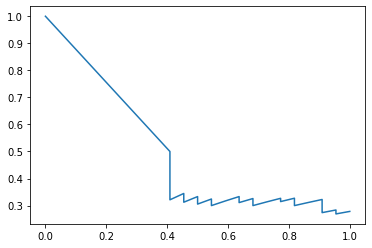

holdout i = PCL_Strict3, roc_auc = 0.7003030303030302


In [32]:
df_preprocessed, features, target_feature = load_data()
#df_preprocessed = df_preprocessed[~df_preprocessed['phq3'].isna()]

secondary_targets = {
     'q6.1_INTRU_target':1,
 'q6.2_DREAM_target':1,
 'q6.3_FLASH_target':1,
 'q6.4_UPSET_target':1,
 'q6.5_PHYS_target':1,
    'PCL_Strict3':1,
#      'q6.1_INTRU_target':2,
#  'q6.2_DREAM_target':2,
#  'q6.3_FLASH_target':2,
#  'q6.4_UPSET_target':2,
#  'q6.5_PHYS_target':2,
#     'PCL_Strict3':0,

    # 'target_avoidance':5,
 #'target_hyper':7,
  #  'phq3':13
}

for j in range(1):
    X, X_out, Y, y_out = train_test_split(df_preprocessed[features + list(secondary_targets.keys())], df_preprocessed['target_binary_intrusion'],\
                                          test_size=0.15, random_state=random_state,\
                                          stratify=df_preprocessed['target_binary_intrusion'])



    for i in [random_state]:
        x_train, x_test, y_train, y_test = train_test_split(X, Y,  random_state=i, test_size=0.2, stratify=Y)
        y_train = [y_train]
        
        for k in secondary_targets.keys():
            y_train.append(x_train[k].apply(lambda x: int(x <= secondary_targets[k])))
        
        x_train = x_train[features]
        x_test = x_test[features]
    
        x_train, x_test = cv_preprocessing(x_train, x_test, i)

        ss = StandardScaler()
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)
        visible = Input(shape=(x_train.shape[1],))
   

        y = Dense(3, activation='relu')(visible)
        y = Dropout(0.1)(y)

        x = Dense(3, activation='relu')(y)
        x = Dropout(0.1)(x)
        
        outputs = [Dense(1, activation='sigmoid')(x)]
        
        
        for i in secondary_targets.keys():
            outputs.append(Dense(1, activation='sigmoid')(x))
        
        
        model = Model(inputs=visible, outputs=outputs)
        #callbacks = [EarlyStopping(monitor='val_loss', patience=5)]
        model.compile(loss=['binary_crossentropy']+['binary_crossentropy'] * len(secondary_targets.keys()),
              optimizer=Adam(), loss_weights = [1] + [1e-1] * len(secondary_targets.keys()))
        model.fit(x_train,y_train , epochs = 275, class_weight=[{0:1, 1:2}]+[{0:1,1:1}] * len(secondary_targets.keys()), verbose=1)
        # evaluate the model
        y_pred = model.predict(x_test)[0]



    
        for t in np.arange(0.1,1,0.1):
            print(t,'f1_score', f1_score(y_test.astype(int), y_pred>t))

        
        precision, recall, _ = precision_recall_curve(y_test.astype(int), y_pred)
        avs = average_precision_score(y_test.astype(int), y_pred)
        print(f"average_precision_score = {avs}")

        auc_score = auc(recall, precision)
        print(f"pr_auc = {auc_score}")
        plt.plot(recall, precision)
        plt.show()
        print(f"holdout i = {i}, roc_auc = {roc_auc_score(y_test.astype(int), y_pred)}")

In [33]:
df_preprocessed, features, target_feature = load_data()
#df_preprocessed = df_preprocessed[~df_preprocessed['phq3'].isna()]
features = ['highschool_diploma', 'ADHD', 'T1Acc1t', 'T1Acc1n', 'T1bias', 'phq1', 'trait1', 'state1', 'PCL1', 'intrusion_PCL_T1', 'T1mean1t', 'T1mean1n', 'ABV', 'q6.1_INTRU', 'q6.2_DREAM', 'q6.3_FLASH', 'q6.4_UPSET', 'q6.5_PHYS', 'q6.6_AVTHT', 'q6.7_AVSIT', 'q6.8_AMNES', 'q6.9_DISINT', 'q6.10_DTACH', 'q6.11_NUMB', 'q6.12_FUTRE', 'q6.13_SLEEP', 'q6.14_ANGER', 'q6.15_CONC', 'q6.16_HYPER', 'q6.17_STRTL', 'T1q5.1', 'T1q5.2', 'T1q5.3', 'T1q5.4', 'T1q5.5', 'T1q5.6', 'T1q5.7', 'T1q5.8', 'T1q5.9']
secondary_targets = {
     'q6.1_INTRU_target':1,
 'q6.2_DREAM_target':1,
 'q6.3_FLASH_target':1,
 'q6.4_UPSET_target':1,
 'q6.5_PHYS_target':1,
    'PCL_Strict3':1,
#      'q6.1_INTRU_target':2,
#  'q6.2_DREAM_target':2,
#  'q6.3_FLASH_target':2,
#  'q6.4_UPSET_target':2,
#  'q6.5_PHYS_target':2,
#     'PCL_Strict3':0,

    # 'target_avoidance':5,
 #'target_hyper':7,
  #  'phq3':13
}

for j in range(1):
    X, X_out, Y, y_out = train_test_split(df_preprocessed[features + list(secondary_targets.keys())], df_preprocessed['target_binary_intrusion'],\
                                          test_size=0.15, random_state=random_state,\
                                          stratify=df_preprocessed['target_binary_intrusion'])



    for i in [random_state]:
        x_train, x_test, y_train, y_test = train_test_split(X, Y,  random_state=i, test_size=0.2, stratify=Y)
        y_train = [y_train]
        
        for k in secondary_targets.keys():
            y_train.append(x_train[k].apply(lambda x: int(x <= secondary_targets[k])))
        
        x_train = x_train[features]
        x_test = x_test[features]
    
        x_train, x_test = cv_preprocessing(x_train, x_test, i)


        visible = Input(shape=(x_train.shape[1],))
   

        y = Dense(3, activation='relu')(visible)
        y = Dropout(0.1)(y)

        x = Dense(3, activation='relu')(y)
        x = Dropout(0.1)(x)
        
        outputs = [Dense(1, activation='sigmoid')(x)]
        
        
        for i in secondary_targets.keys():
            outputs.append(Dense(1, activation='sigmoid')(x))
        
        
        model = Model(inputs=visible, outputs=outputs)
        #callbacks = [EarlyStopping(monitor='val_loss', patience=5)]
        model.compile(loss=['binary_crossentropy']+['binary_crossentropy'] * len(secondary_targets.keys()),
              optimizer=Adam(), loss_weights = [1] + [1e-1] * len(secondary_targets.keys()))
        model.fit(x_train,y_train , epochs = 275, class_weight=[{0:1, 1:2}]+[{0:1,1:1}] * len(secondary_targets.keys()), verbose=1)
        # evaluate the model
        y_pred = model.predict(x_test)[0]



    
        for t in np.arange(0.1,1,0.1):
            print(t,'f1_score', f1_score(y_test.astype(int), y_pred>t))

        
        precision, recall, _ = precision_recall_curve(y_test.astype(int), y_pred)
        avs = average_precision_score(y_test.astype(int), y_pred)
        print(f"average_precision_score = {avs}")

        auc_score = auc(recall, precision)
        print(f"pr_auc = {auc_score}")
        plt.plot(recall, precision)
        plt.show()
        print(f"holdout i = {i}, roc_auc = {roc_auc_score(y_test.astype(int), y_pred)}")

KeyError: "['T1mean1n', 'T1mean1t', 'intrusion_PCL_T1', 'ABV'] not in index"